<a href="https://colab.research.google.com/github/Bimee-Stack/Advanced-Mathematics-Coursework/blob/main/Advanced_Mathematics_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 01 (a)

In [31]:
import sympy as sp

x, y = sp.symbols('x y ', real=True, positive=True)
a,b,c = sp.symbols('a b c', real=True)

TTB = a * x**2 + b * y**2
grad_TTB = (sp.diff(TTB, x), sp.diff(TTB, y))
print("Gradient of TTB:", grad_TTB)

TTT = sp.sqrt(c * (x**2 + y**2))
grad_TTT = (sp.diff(TTT, x), sp.diff(TTT, y))
print("Gradient of TTT:", grad_TTT)

Gradient of TTB: (2*a*x, 2*b*y)
Gradient of TTT: (sqrt(c)*x/sqrt(x**2 + y**2), sqrt(c)*y/sqrt(x**2 + y**2))


Problem 01 (b)

Buses depend on :
  
1.   Actual distance they travel
2.   Extra Delays (Stops & Traffic Lights)

*  'a'- measures how bad stops
*  'b'- measures how bad traffic
*   If ax>by : (lots of stops on the route ) A long rote with a bus stop every few blocks
*   If ax<by : (heavy traffic) Buses usually suffer most from all those frequent stops,even more than from the miles they drive


---
Taxis :

1.   Distance * Traffic delays


*   When traffic is light, The trip is mostly depend on the distance (delays are small)
*   When the traffic is heavy, The congestion completely takes over and the trip feels endlessly slow, no matter the distance(delays are huge)















Problem 02 (a)

In [32]:
t = sp.symbols('t')

Fb = sp.integrate(2*t + 1, (t, 0, x))
Ft = sp.integrate(3*t + 2, (t, 0, x))

print("Fb(x) =", Fb)
print("Ft(x) =", Ft)

Fb(x) = x**2 + x
Ft(x) = 3*x**2/2 + 2*x


Problem 02 (b)

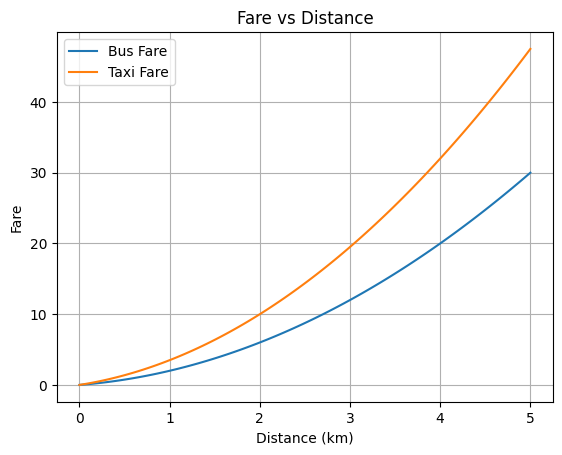

In [33]:
import numpy as np
import matplotlib.pyplot as plt

xs = np.linspace(0, 5, 100)
Fb_num = xs**2 + xs
Ft_num = 1.5 * xs**2 + 2 * xs

plt.figure()
plt.plot(xs, Fb_num, label='Bus Fare')
plt.plot(xs, Ft_num, label='Taxi Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.title('Fare vs Distance')
plt.legend()
plt.grid(True)
plt.show()

Problem 02 (c)

Bus is more affordable for budget passengers for longer routes, while Taxi suitable for short distances, time sensitive trips despite higher cost.


Problem 03 (a)

In [34]:
import numpy as np
import matplotlib.pyplot as plt


t = np.linspace(0,24,50000)
SeriesP = 5 + 4*np.sin(np.pi*t) - 1.5*(t**2) + (t**4)/4

Problem 03 (b)

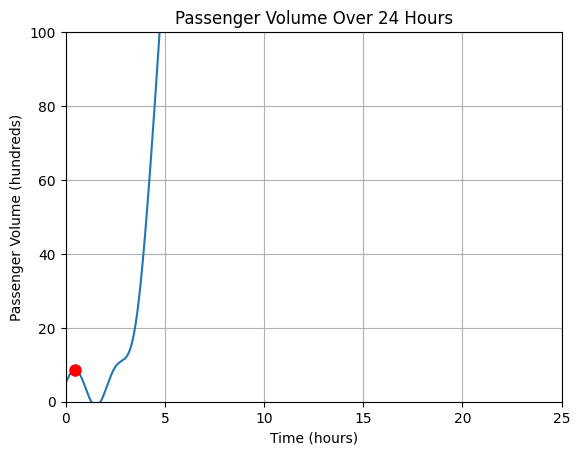

Automatically detected peak travel periods:
 - Peak 1: at 0.5 hours (8.7 hundred passengers)


In [35]:
from scipy.signal import find_peaks

t = np.linspace(0, 24, 1000)
SeriesP = 5 + 4*np.sin(np.pi*t) - 1.5*(t**2) + (t**4)/4
peaks, _ = find_peaks(SeriesP, height=5)

# Plot
plt.figure()
plt.plot(t, SeriesP)
plt.plot(t[peaks], SeriesP[peaks], "ro", markersize=8)

plt.xlabel('Time (hours)')
plt.ylabel('Passenger Volume (hundreds)')
plt.ylim(0, 100)
plt.xlim(0, 25)
plt.title('Passenger Volume Over 24 Hours')
plt.grid(True)
plt.show()

#detected peaks
print("Automatically detected peak travel periods:")
for i, peak_idx in enumerate(peaks):
    peak_time = t[peak_idx]
    peak_volume = SeriesP[peak_idx]
    print(f" - Peak {i+1}: at {peak_time:.1f} hours ({peak_volume:.1f} hundred passengers)")

Problem 03 (c)


*   Midnight to 5AM : Vey low volume, few people are traveling
*   Morning Peak : Sharp rise starting around 5 AM, reaching almost 10,000 passengers.

    This is the huge morning rush hour




Problem 04 (a)

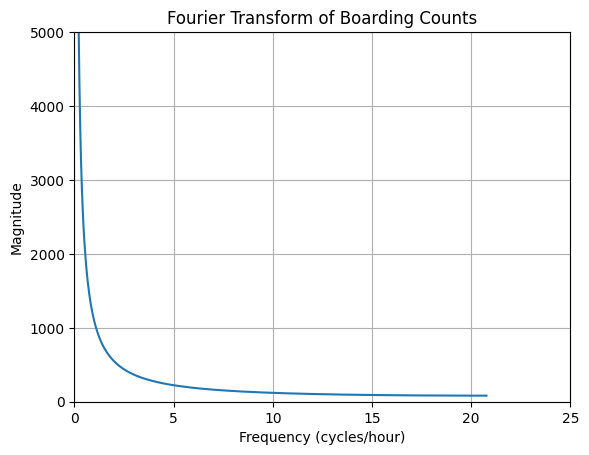

In [36]:
from scipy.fft import fft, fftfreq

t = np.linspace(0, 24, 1000)
SeriesP = 5 + 4*np.sin(np.pi*t) - 1.5*(t**2) + (t**4)/4

# FFT
N = len(SeriesP)
yf = fft(SeriesP)
xf = fftfreq(N, d=t[1]-t[0])

# Plot
plt.figure()
plt.plot(xf[:N//2], 2/N * np.abs(yf[:N//2]))
plt.xlabel('Frequency (cycles/hour)')
plt.ylabel('Magnitude')
plt.ylim(0, 5000)
plt.xlim(0, 25)
plt.title('Fourier Transform of Boarding Counts')
plt.grid(True)
plt.show()

Problem 04 (b)

*   Graph shows a smooth decreasing curve from high magnitude at low frequencies to almost zero at higher frequencies.

*   **Strongest Part** : Near Frequency 0 -This is the average boarding count over the day. From this we can conclude overall daily passenger level
*   No clear sharp spikes at higher frequencies - The polynomial terms ($t^2$ and $t^4$) create a gradual trend rather than repeating waves





Problem 04 (c)
1.   Arrange extra buses and taxis ready just before these busy times
2.   Use fewer vehicles during quiet hours (late morning or night)

*   From this we can minimize passengers    wait for buses and taxis.
*   buses never go empty

*   Company saves fuel and money.










Problem 05 (a)

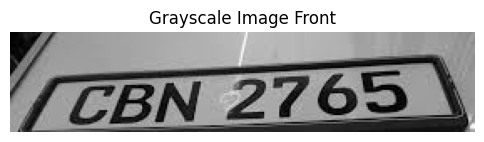

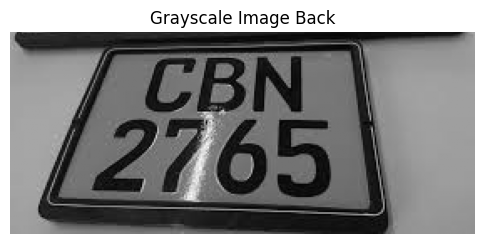

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
img = cv2.imread('/content/ehicle_plate.png')


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_height = img_rgb.shape[0]
frontImg = img_rgb[0:img_height//3, :, :]
backImg = img_rgb[img_height//3:, :, :]


afterGSF = cv2.cvtColor(frontImg, cv2.COLOR_RGB2GRAY)

afterGSB = cv2.cvtColor(backImg, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(6,4))
plt.imshow(afterGSF, cmap='gray')
plt.title('Grayscale Image Front')
plt.axis('off')
plt.show()

plt.figure(figsize=(6,4))
plt.imshow(afterGSB, cmap='gray')
plt.title('Grayscale Image Back')
plt.axis('off')
plt.show()

Problem 05 (b)

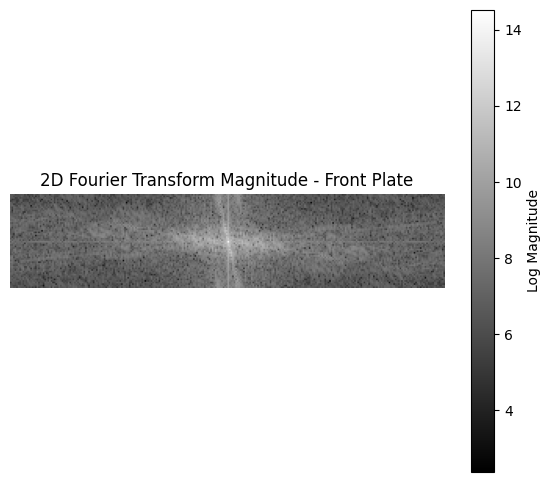

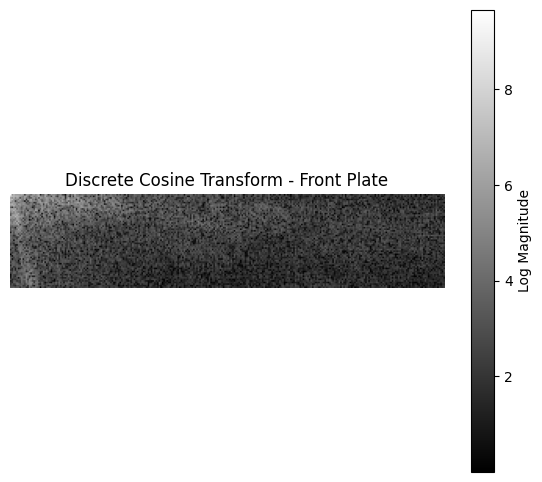

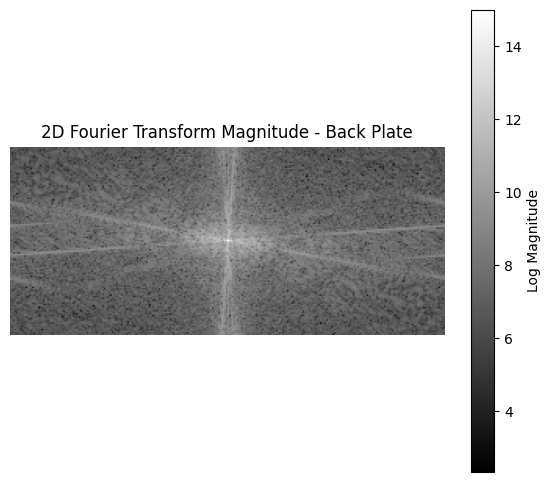

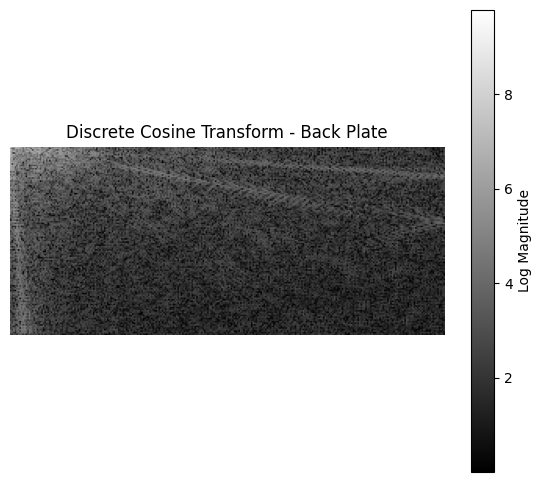

In [38]:
from scipy.fft import fft2, fftshift
from scipy.fftpack import dctn

# Fourier Transform magnitude spectrum
def plot_ft_spectrum(gray_img, title):
    ft = fftshift(fft2(gray_img))
    magnitude = np.log(np.abs(ft) + 1)
    plt.figure(figsize=(7,6))
    plt.imshow(magnitude, cmap='gray')
    plt.title(title)
    plt.colorbar(label='Log Magnitude')
    plt.axis('off')
    plt.show()

# Discrete Cosine Transform
def plot_dct_spectrum(gray_img, title):
    dct_img = dctn(gray_img, norm='ortho')
    magnitude = np.log(np.abs(dct_img) + 1)
    plt.figure(figsize=(7,6))
    plt.imshow(magnitude, cmap='gray')
    plt.title(title)
    plt.colorbar(label='Log Magnitude')
    plt.axis('off')
    plt.show()


# Front plate
plot_ft_spectrum(afterGSF, '2D Fourier Transform Magnitude - Front Plate')
plot_dct_spectrum(afterGSF, 'Discrete Cosine Transform - Front Plate')

# Back plate
plot_ft_spectrum(afterGSB, '2D Fourier Transform Magnitude - Back Plate')
plot_dct_spectrum(afterGSB, 'Discrete Cosine Transform - Back Plate')

Problem 05 (c)

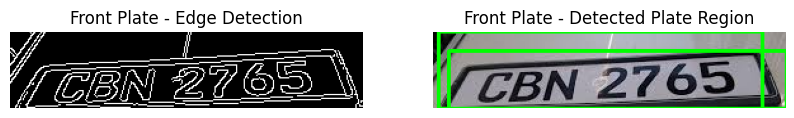

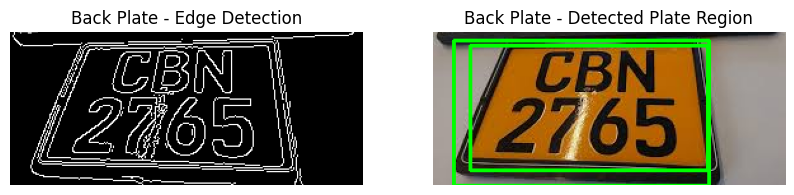

In [39]:
def localise_plate(rgb_img, title_prefix):

    gray = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

    # Edge detection using Canny
    edges = cv2.Canny(gray, 100, 200)

    # contours
    contours, _ = cv2.findContours(
        edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    detected_img = rgb_img.copy()

    # Loop through contours and filter possible plate regions
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / h

        if w > 80 and h > 25 and 1.5 < aspect_ratio < 6:
            cv2.rectangle(
                detected_img,
                (x, y),
                (x + w, y + h),
                (0, 255, 0),
                2
            )

    # Visualization
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(edges, cmap='gray')
    plt.title(f'{title_prefix} - Edge Detection')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(detected_img)
    plt.title(f'{title_prefix} - Detected Plate Region')
    plt.axis('off')

    plt.show()


#localisation to front and back plates
localise_plate(frontImg, 'Front Plate')
localise_plate(backImg, 'Back Plate')


Problem 05 (d)

Fourier Transform

The Fourier Transform shows how image details are distributed in terms of frequency

*   Low frequencies
    
    Represent smooth and uniform areas such as the background in terms of the number plate
*   High frequencies

    Represent edges, corners and text, such as the letters and numbers on the plate

    From the magnitude spectrum :





*   A bright center means the image has strong background information
*   Bright regions away from the center indicate sharp edges and characters.
It helps us understand where important details like text are located in the image.


Discrete Cosine Transform(DCT)

The DCT works similarly to Fourier Transform but is more compact



*   Most important information is stored in a few low-frequency DC coefficients.
*   High-frequency coefficients mainly contain fine details and noise.

How do Fourier and DCT help in number plate recognition?


1.   Improving text detection

* Number plates contain strong edges and repeated patterns(letters and numbers)
* These appear clearly in the high-frequency components
* Frequncy analysis makes it easier to seperate text from the background.    




2.   Noise and lighting reduction


*   By removing unwanted high-frequency noise or very low-frequency lighting variations, the plate becomes clearer to for OCR.


3.   Feature Extraction


*   DCT coefficients can be used as compact features for machine learning models.
*   This improves recognition accuracy while reducing computation time


4.  Compression and Speed


*   DCT helps store and process images efficiently, which is important for real-time systems like traffic cameras.


Potential applications for traffic optimization

Fourier and DCT-based number plate recognition can support:


*   Traffic Monitoring
*   Route Optimization
*   Law Enforcement
*   Smart city applications














